# Regularization

In any kind of model training, overfitting is one of the major challenges. Overfitting is when the model follows the training data extremely well but performs poorly on unseen data. This occurs when the model training overcompensates for the training error while estimating the trainable parameters, often leading to estimates that are overly complex.

An example of this is fitting a high-degree polynomial to a linearly distributed data. Even though a high-degree polynomial will perfectly fits the given data, it will have high error on the next data point. One way to think about overfitting is that we have a model that is too complex for the problem, and this complexity allows the model to fit to random noise.

## Overfitting in Linear Regression

In linear regression, overfitting can occur due to multiple reasons some of which could be

* **High dimensionality:**
If the number of predictors, *p*, is large relative to the number of observations, *n*, the model can always find coefficients that explain the training data extremely well, even if many predictors are irrelevant. In extreme cases, if $p \ge n$, the model can fit the data perfectly (zero training error), but will generalize poorly.
* **Multicollinearity:**
Highly correlated features can make the regression coefficients unstable, letting the model latch onto random fluctuations in the data.
* **Noise fitting:**
The model tries to minimize squared error, so it may assign large weights to certain predictors just to reduce error from random noise.

## Handling overfitting

To keep the model from becoming overly complex and to improve its ability to generalize, we apply a technique known as ***regularization***. In simple terms, regularization is introducing an additional constraint during training. This discourages the model from relying too heavily on any one feature or from allowing coefficients to grow excessively large.

Regularization techniques can be broadly categories in one of the two forms
* **Shrinking:** These methods work by directly penalizing large coefficient values, forcing the model parameters to remain small and stable. This “shrinkage” reduces variance and guards against overfitting.

* **Bayesian prior:** These methods take a probabilistic view, where regularization naturally arises from placing prior distributions on parameters.

## Overfitting in Linear Regression

Let us consider a simple linear regression scenario with two independent variables, $x_1 and x_2$, of which $x_1$ is random noise, uncorrelated to the target variable $y$.

<IPython.core.display.Math object>

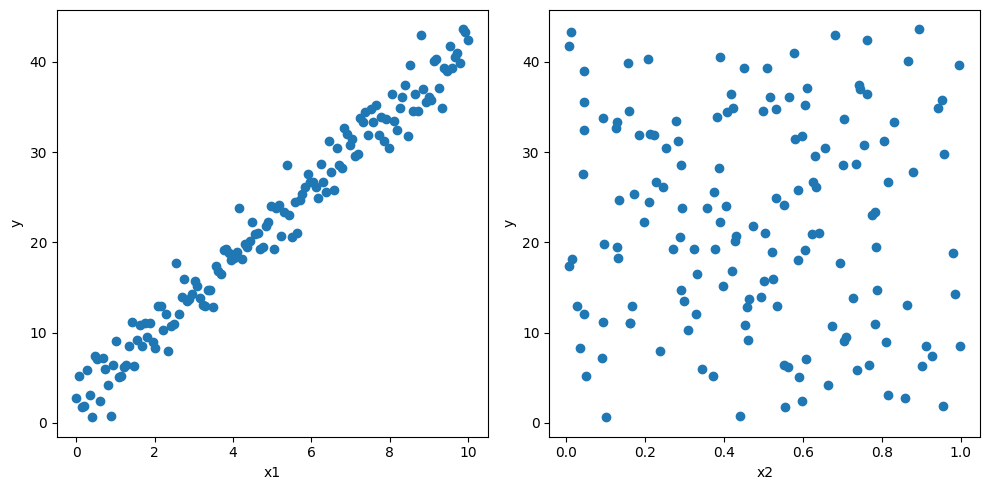

In [260]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(32)
x1 = np.linspace(0, 10, 150)
x2 = np.random.uniform(0, 1, len(x1))
error = np.random.normal(0, 2, len(x1))
mse = (error**2).sum()/len(y)
display(Math(f"MSE = {mse}"))
y = 4*x1 + 2 + error
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(x1, y)
plt.xlabel("x1")
plt.ylabel("y")
plt.subplot(1,2,2)
plt.scatter(x2, y)
plt.xlabel("x2")
plt.ylabel("y")
plt.tight_layout()
X = np.column_stack([np.ones_like(x1), x1, x2])

In [200]:
from IPython.display import display, Math

In [261]:
beta_list = []
mse_list = []
for i in range(100):
    np.random.seed(42+i)
    train_idx = np.random.choice(range(150), 100, replace=False)
    test_idx = np.array(list(set(range(150)) - set(train_idx)))

    X_train = X[train_idx,:]
    X_test = X[test_idx,:]
    y_train = y[train_idx]
    y_test = y[test_idx]

    beta = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train
    beta_list.append(beta)
    # display(Math(f"\\beta_0 = {beta[0]}\\\\ \\beta_1 = {beta[1]}\\\\ \\beta_2 = {beta[2]}"))
    y_hat = X_test @ beta
    residual = y_hat - y_test
    # plt.scatter(y, residual)
    # plt.xlabel("y")
    # plt.ylabel("residuals")
    mse = (residual**2).sum()/len(y)
    mse_list.append(mse)
    # display(Math(f"MSE = {mse}"))

In [269]:
beta_list2 = []
mse_list2 = []
for i in range(100):
    np.random.seed(42+i)
    train_idx = np.random.choice(range(150), 100, replace=False)
    test_idx = np.array(list(set(range(150)) - set(train_idx)))

    X_train = X[train_idx,:]
    X_test = X[test_idx,:]
    y_train = y[train_idx]
    y_test = y[test_idx]

    beta = np.linalg.inv(X_train.T @ X_train + 20*np.identity(X_train.shape[1])) @ X_train.T @ y_train
    beta_list2.append(beta)
    # display(Math(f"\\beta_0 = {beta[0]}\\\\ \\beta_1 = {beta[1]}\\\\ \\beta_2 = {beta[2]}"))
    y_hat = X_test @ beta
    residual = y_hat - y_test
    # plt.scatter(y, residual)
    # plt.xlabel("y")
    # plt.ylabel("residuals")
    mse = (residual**2).sum()/len(y)
    mse_list2.append(mse)
    # display(Math(f"MSE = {mse}"))

In [270]:
np.array(beta_list).std(axis=0)

array([0.34185269, 0.04324909, 0.38126347])

In [271]:
np.array(beta_list).mean(axis=0)

array([2.27538913, 3.94699324, 0.53198533])

In [272]:
np.array(beta_list2).std(axis=0)

array([0.12463531, 0.02925499, 0.09760252])

In [273]:
np.array(beta_list2).mean(axis=0)

array([1.49089051, 4.02983109, 0.68335891])

In [274]:
np.array(mse_list).std()

np.float64(0.21031944862446317)

In [275]:
np.array(mse_list2).std()

np.float64(0.2267055838154058)

In [290]:
from sklearn.linear_model import ridge_regression
coef = ridge_regression(X, y, alpha=.1, return_intercept=False,
                                   random_state=0)

In [291]:
coef

array([2.2368655 , 3.94949904, 0.56901262])

In [279]:
intercept

np.float64(2.2003329511561343)